In [15]:
import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.special import erf

In [26]:
def classic_ddm(v,theta,z,T,dt):
    dv = z
    n_T = int(T/dt)
    dv_arr = np.full(n_T, np.nan)
    dv_arr[0] = dv
    dB = dt**0.5
    for i in range(1,n_T):
        dv += v*dt + np.random.normal(0, dB)
        dv_arr[i] = (dv/theta) + 1

        if dv >= theta or dv <= -theta:
            return dv_arr

In [27]:
N_sim = int(5e3)
dt = 1e-4

v = 1.5
theta = 2
z = 0
T = 2

dv_distr = np.zeros((N_sim, int(T/dt)))
t_pts = np.arange(0, T, dt)

for N in tqdm(range(N_sim)):
    dv_distr[N,:] = classic_ddm(v,theta,z,T,dt)

100%|██████████| 5000/5000 [01:06<00:00, 75.62it/s]


In [41]:
x1 = 1; x2 = 2;
prob_x1_x2 = np.zeros_like(t_pts)

for i in tqdm(range(1,len(t_pts))):
    # remove nan from dv_distr[:,i]
    dv_distr_i = dv_distr[:,i]
    dv_distr_i = dv_distr_i[~np.isnan(dv_distr_i)]
    prob_x1_x2[i] = np.sum((dv_distr_i >= x1) & (dv_distr_i <= x2))/N_sim

    

100%|██████████| 19999/19999 [00:01<00:00, 10759.92it/s]


In [34]:
def P_small_t_btn_x1_x2_v1(x1, x2, t, v, theta, z, K_max):
    """
    Integration of P_small(x,t) btn x1 and x2
    """
    def Phi(x):
        """
        Define the normal cumulative distribution function Φ(x) using erf
        """
        return 0.5 * (1 + erf(x / np.sqrt(2)))

    if t <= 0:
        return 0
    

    mu = v*theta
    z = (z/theta) + 1.0

    
    t_theta = theta**2
    t /= t_theta

    result = 0
    
    sqrt_t = np.sqrt(t)
    
    for n in range(-K_max, K_max + 1):
        term1 = np.exp(4 * mu * n) * (
            Phi((x2 - (z + 4 * n + mu * t)) / sqrt_t) -
            Phi((x1 - (z + 4 * n + mu * t)) / sqrt_t)
        )
        
        term2 = np.exp(2 * mu * (2 * (1 - n) - z)) * (
            Phi((x2 - (-z + 4 * (1 - n) + mu * t)) / sqrt_t) -
            Phi((x1 - (-z + 4 * (1 - n) + mu * t)) / sqrt_t)
        )
        
        result += term1 - term2
    
    return result


In [42]:
t_theory_pts = np.linspace(0, 1, 1000)
prob_x1_x2_theory = [P_small_t_btn_x1_x2_v1(x1, x2, t, v, theta, z, 10) for t in t_theory_pts]


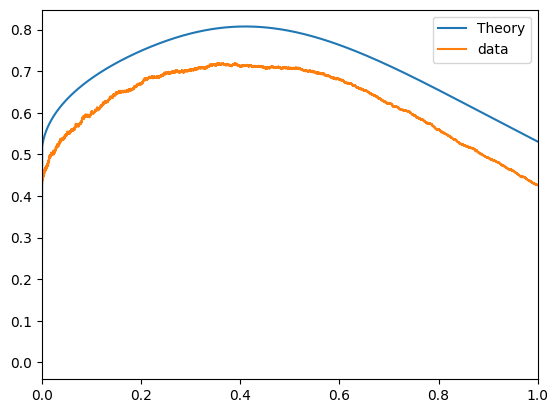

In [43]:
plt.plot(t_theory_pts, prob_x1_x2_theory, label='Theory')
plt.plot(t_pts, prob_x1_x2, label='data')
plt.legend()
plt.xlim([0, 1]);